## **TIME SERIES**

In [1]:
# Read file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**DATA PREPARATION**

Column headings are added to dataset.

In [2]:
# Import libraries
import pandas as pd

# Define column names
column_names = ["Time", "EventType", "Cluster", "Duration", "LoggedInUsers"]

data = pd.read_csv('/content/drive/MyDrive/UserLog.csv/UserLog.csv', names=column_names)


In [3]:
# Check the first few rows to understand the data
data.head()

,Time,EventType,Cluster,Duration,LoggedInUsers
0,Fri Jan 01 00:00:00 GMT 2010,LOGIN,FELL,1261840,1
1,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,10058927,2
2,Fri Jan 01 00:00:00 GMT 2010,LOGIN,SIDE,6868990,3
3,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,2997017,4
4,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,8919800,5


Data has 2459638 rows and 5 columns.

In [4]:
data.shape

(2459638, 5)

Below table reveals that durations vary widely, with a mean of approximately 1.91 million units, while the number of logged-in users has a moderate mean of about 452, suggesting relatively consistent activity levels.

In [5]:
data.describe()

,Duration,LoggedInUsers
count,2.459638e+06,2.459638e+06
mean,1.907886e+06,4.525057e+02
std,5.442523e+06,2.586442e+02
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.170000e+02
50%,9.220000e+02,4.520000e+02
75%,1.865905e+06,6.890000e+02
max,1.329522e+09,1.024000e+03


In [6]:
# Check for null values
null_values = data.isnull().sum()
print("Null values in the DataFrame:")
null_values

Null values in the DataFrame:


Time             0
EventType        0
Cluster          0
Duration         0
LoggedInUsers    0
dtype: int64

Duplicate entries are removed.

In [7]:
duplicate_rows = data[data.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")
    print("Shape of duplicate rows:", duplicate_rows.shape)
    data = data.drop_duplicates()
    print("Duplicate rows dropped!")

print("Shape of DataFrame after dropping duplicates:", data.shape)


Duplicate rows found.
Shape of duplicate rows: (730, 5)
Duplicate rows dropped!
Shape of DataFrame after dropping duplicates: (2458908, 5)


Time column data if converted to date-time format (machine understandable form) with standard time-zone utc and stored in new dataframe called 'datetime'.

In [8]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Convert timestamps to datetime format in GMT/BST
data["datetime"] = pd.to_datetime(data["Time"], utc=True, errors='coerce')


Label encoded the categorical data columns - CLuster Names and Event Types.

In [9]:
# Label Encoding the 'Cluster' column

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Cluster_encoded'] = label_encoder.fit_transform(data['Cluster'])

data.head(10)

,Time,EventType,Cluster,Duration,LoggedInUsers,datetime,Cluster_encoded
0,Fri Jan 01 00:00:00 GMT 2010,LOGIN,FELL,1261840,1,2010-01-01 00:00:00+00:00,9
1,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,10058927,2,2010-01-01 00:00:00+00:00,15
2,Fri Jan 01 00:00:00 GMT 2010,LOGIN,SIDE,6868990,3,2010-01-01 00:00:00+00:00,28
3,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,2997017,4,2010-01-01 00:00:00+00:00,15
4,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,8919800,5,2010-01-01 00:00:00+00:00,15
5,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,4426803,6,2010-01-01 00:00:00+00:00,15
6,Fri Jan 01 00:21:01 GMT 2010,LOGOUT,FELL,0,5,2010-01-01 00:21:01+00:00,9
7,Fri Jan 01 00:29:47 GMT 2010,LOGIN,PETH,2870110,6,2010-01-01 00:29:47+00:00,25
8,Fri Jan 01 00:49:57 GMT 2010,LOGOUT,LAKE,0,5,2010-01-01 00:49:57+00:00,15
9,Fri Jan 01 01:13:46 GMT 2010,LOGOUT,LAKE,0,4,2010-01-01 01:13:46+00:00,15


In [10]:
#Label Encoding 'EventType' Column

data['EventType_encoded'] = label_encoder.fit_transform(data['EventType'].str.strip())  # Remove leading and trailing spaces

# Replacing 'LOGIN' with 1 and 'LOGOUT' with 0
data['EventType_encoded'] = data['EventType_encoded'].replace({label_encoder.transform(['LOGIN'])[0]: 1,
                                                               label_encoder.transform(['LOGOUT'])[0]: 0})

data.head(10)

,Time,EventType,Cluster,Duration,LoggedInUsers,datetime,Cluster_encoded,EventType_encoded
0,Fri Jan 01 00:00:00 GMT 2010,LOGIN,FELL,1261840,1,2010-01-01 00:00:00+00:00,9,1
1,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,10058927,2,2010-01-01 00:00:00+00:00,15,1
2,Fri Jan 01 00:00:00 GMT 2010,LOGIN,SIDE,6868990,3,2010-01-01 00:00:00+00:00,28,1
3,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,2997017,4,2010-01-01 00:00:00+00:00,15,1
4,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,8919800,5,2010-01-01 00:00:00+00:00,15,1
5,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,4426803,6,2010-01-01 00:00:00+00:00,15,1
6,Fri Jan 01 00:21:01 GMT 2010,LOGOUT,FELL,0,5,2010-01-01 00:21:01+00:00,9,0
7,Fri Jan 01 00:29:47 GMT 2010,LOGIN,PETH,2870110,6,2010-01-01 00:29:47+00:00,25,1
8,Fri Jan 01 00:49:57 GMT 2010,LOGOUT,LAKE,0,5,2010-01-01 00:49:57+00:00,15,0
9,Fri Jan 01 01:13:46 GMT 2010,LOGOUT,LAKE,0,4,2010-01-01 01:13:46+00:00,15,0


Computeing the number of seconds elapsed since the Unix epoch (January 1, 1970) for each datetime value in the 'datetime' column of the DataFrame 'data'. This conversion facilitates numerical analysis and manipulation of time-related data.

In [12]:
data['datetime_seconds'] = data['datetime'].apply(lambda x:pd.Timestamp.timestamp(x)) #Convert each datetime into seconds


Reviewing all the columns of data.

In [15]:
data.head()

,Time,EventType,Cluster,Duration,LoggedInUsers,datetime,Cluster_encoded,EventType_encoded,datetime_seconds
0,Fri Jan 01 00:00:00 GMT 2010,LOGIN,FELL,1261840,1,2010-01-01 00:00:00+00:00,9,1,1.262304e+09
1,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,10058927,2,2010-01-01 00:00:00+00:00,15,1,1.262304e+09
2,Fri Jan 01 00:00:00 GMT 2010,LOGIN,SIDE,6868990,3,2010-01-01 00:00:00+00:00,28,1,1.262304e+09
3,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,2997017,4,2010-01-01 00:00:00+00:00,15,1,1.262304e+09
4,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,8919800,5,2010-01-01 00:00:00+00:00,15,1,1.262304e+09


The table below summarizes the statistics for several columns in the dataset:

Duration: The average duration of events is approximately 1.9 million seconds, with a wide range of variation (standard deviation of around 5.4 million seconds).

LoggedInUsers: On average, there are around 452 logged-in users during events, with a standard deviation of approximately 259 users.

Cluster_encoded: The events are distributed across various clusters, with an average encoded cluster value of approximately 19.

EventType_encoded: There is a nearly equal distribution of event types, as indicated by an average encoded event type value close to 0.5.

datetime_seconds: The timestamps range from around 1.26 billion seconds to 1.29 billion seconds since the Unix epoch.

In [13]:
data.describe()

,Duration,LoggedInUsers,Cluster_encoded,EventType_encoded,datetime_seconds
count,2.458908e+06,2.458908e+06,2.458908e+06,2.458908e+06,2.458908e+06
mean,1.908452e+06,4.524630e+02,1.923902e+01,5.001484e-01,1.277994e+09
std,5.443232e+06,2.586528e+02,1.133062e+01,5.000001e-01,9.958476e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.262304e+09
25%,0.000000e+00,2.170000e+02,9.000000e+00,0.000000e+00,1.268305e+09
50%,4.336500e+03,4.520000e+02,2.100000e+01,1.000000e+00,1.275414e+09
75%,1.867177e+06,6.890000e+02,2.900000e+01,1.000000e+00,1.288178e+09
max,1.329522e+09,1.024000e+03,3.600000e+01,1.000000e+00,1.293837e+09


**Data Exploration** : Equal number of login and logout events are observed in the dataset. Longer duration of students engagement are seen in ISAAC, SIDE and ORACLE clusters as visible in below point graph.

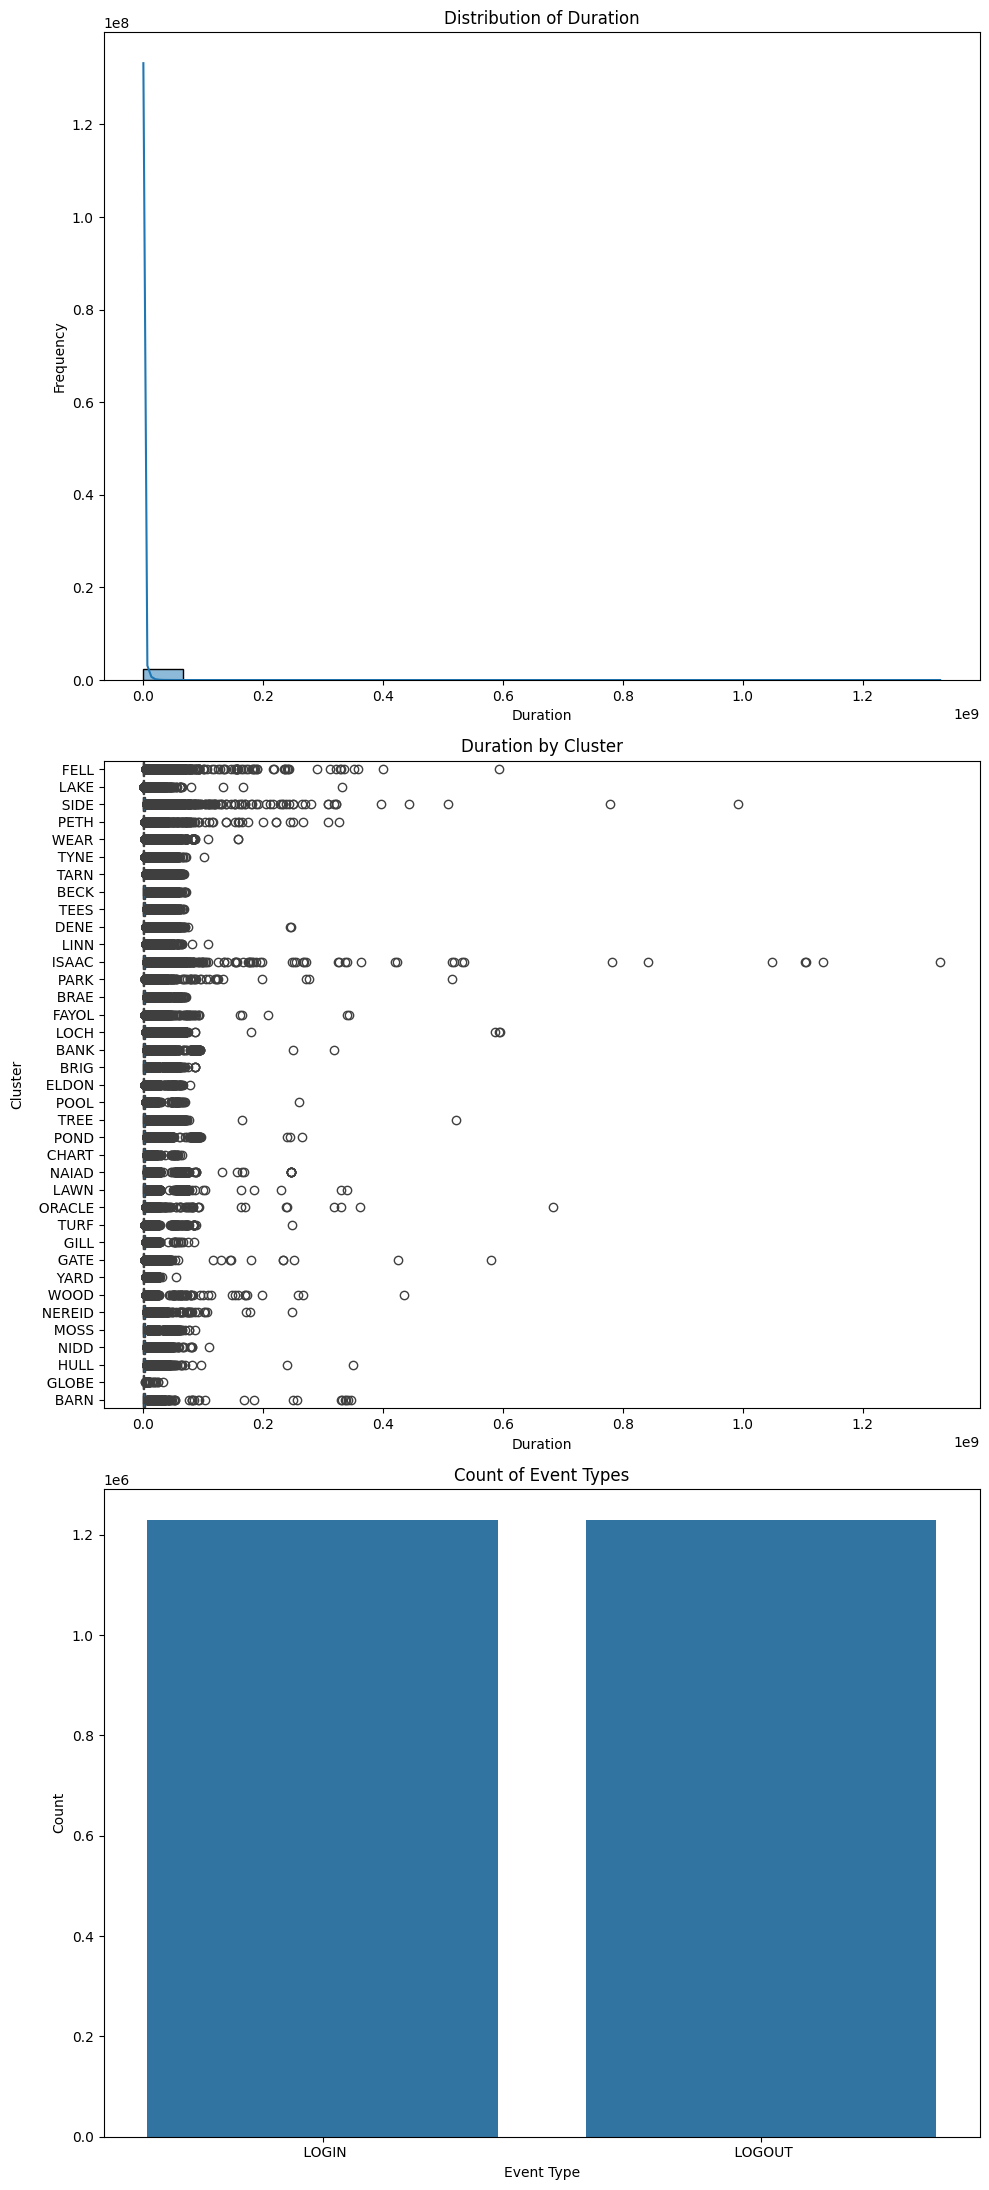

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 22))

# Histogram of duration
sns.histplot(data=data, x='Duration', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Duration')
axes[0].set_xlabel('Duration')
axes[0].set_ylabel('Frequency')

# Boxplot of duration by cluster
sns.boxplot(data=data, y='Cluster', x='Duration', ax=axes[1])
axes[1].set_title('Duration by Cluster')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Cluster')

# Countplot of event type
sns.countplot(data=data, x='EventType', ax=axes[2])
axes[2].set_title('Count of Event Types')
axes[2].set_xlabel('Event Type')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Removing N-100 rows from data for training model.

In [16]:
# Remove the last 100 rows from the DataFrame
data_updated = data.iloc[:-100]

# Display the modified DataFrame on which will be working
data_updated

,Time,EventType,Cluster,Duration,LoggedInUsers,datetime,Cluster_encoded,EventType_encoded,datetime_seconds
0,Fri Jan 01 00:00:00 GMT 2010,LOGIN,FELL,1261840,1,2010-01-01 00:00:00+00:00,9,1,1.262304e+09
1,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,10058927,2,2010-01-01 00:00:00+00:00,15,1,1.262304e+09
2,Fri Jan 01 00:00:00 GMT 2010,LOGIN,SIDE,6868990,3,2010-01-01 00:00:00+00:00,28,1,1.262304e+09
3,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,2997017,4,2010-01-01 00:00:00+00:00,15,1,1.262304e+09
4,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,8919800,5,2010-01-01 00:00:00+00:00,15,1,1.262304e+09
...,...,...,...,...,...,...,...,...,...
2459533,Fri Dec 31 17:26:15 GMT 2010,LOGIN,FELL,931930,18,2010-12-31 17:26:15+00:00,9,1,1.293816e+09
2459534,Fri Dec 31 17:29:55 GMT 2010,LOGIN,LAKE,612450,19,2010-12-31 17:29:55+00:00,15,1,1.293817e+09
2459535,Fri Dec 31 17:32:02 GMT 2010,LOGIN,FELL,724776,20,2010-12-31 17:32:02+00:00,9,1,1.293817e+09
2459536,Fri Dec 31 17:35:48 GMT 2010,LOGIN,SIDE,4436550,21,2010-12-31 17:35:48+00:00,28,1,1.293817e+09


In [17]:
data_updated.shape

(2458808, 9)

### **TASK 1**- Given a sequence of events (in the format listed above) predict the next 100 login / logout times.

***MODEL 1*** - Considering all features using mean absolute error loss function in LSTM

In [23]:
X = data_updated[['EventType_encoded','Cluster_encoded','Duration','LoggedInUsers','datetime_seconds']]
y = data_updated['datetime_seconds']

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler for X
X_scaler = MinMaxScaler()

# Initialize MinMaxScaler for y
y_scaler = MinMaxScaler()

# Normalization of X
X = X_scaler.fit_transform(X)

# Normalization of y
y = y_scaler.fit_transform(y.values.reshape(-1, 1))

In [35]:
import pandas as pd
import numpy as np

# Calculate the total number of rows in the dataset
total_rows = X.shape[0]

# Divide the data into training and test sets
train_rows = int(total_rows * 0.8)  # 80% for training
test_rows = total_rows - train_rows  # Remaining for test

# Select the first 80% of rows for training
train_data = X[:train_rows]

# Select the remaining 20% of rows for testing
test_data = X[train_rows:]

# Convert the subsets into DataFrame and assign column names
column_names = ['EventType_encoded', 'Cluster_encoded', 'Duration', 'LoggedInUsers', 'datetime_seconds']
train_data = pd.DataFrame(train_data, columns=column_names)
test_data = pd.DataFrame(test_data, columns=column_names)



In [36]:
def window_function(dataframe, sqnce_lngth, steps, col_name): #function for creating time series dataset
    sequences = []
    targets = []
    target_df = dataframe[col_name]
    for i in range(len(dataframe) - sqnce_lngth - steps + 1):
        sqnce = dataframe[i:i + sqnce_lngth]
        trgt = target_df[i + sqnce_lngth:i + sqnce_lngth + steps]
        sequences.append(sqnce)
        targets.append(trgt)

    return np.array(sequences), np.array(targets)

In [38]:
import numpy as np

Xtrain_generator,ytrain_generator = window_function(train_data, 10, 1, "datetime_seconds")
Xtest_generator, ytest_generator = window_function(test_data, 10, 1, "datetime_seconds")

In [39]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# LSTM model architecture
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=False, input_shape=(10, 5)))
lstm_model.add(Dense(units=1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_absolute_error')
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                11200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11251 (43.95 KB)
Trainable params: 11251 (43.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
history = lstm_model.fit(Xtrain_generator, ytrain_generator, epochs=20) #fit lstm on time series data

Epoch 1/20
61470/61470 [==============================] - 205s 3ms/step - loss: 0.0016
Epoch 2/20
61470/61470 [==============================] - 204s 3ms/step - loss: 8.3395e-04
Epoch 3/20
61470/61470 [==============================] - 204s 3ms/step - loss: 6.6382e-04
Epoch 4/20
61470/61470 [==============================] - 205s 3ms/step - loss: 5.7078e-04
Epoch 5/20
61470/61470 [==============================] - 204s 3ms/step - loss: 5.1585e-04
Epoch 6/20
61470/61470 [==============================] - 205s 3ms/step - loss: 4.6538e-04
Epoch 7/20
61470/61470 [==============================] - 205s 3ms/step - loss: 4.3428e-04
Epoch 8/20
61470/61470 [==============================] - 204s 3ms/step - loss: 4.0815e-04
Epoch 9/20
61470/61470 [==============================] - 203s 3ms/step - loss: 3.8838e-04
Epoch 10/20
61470/61470 [==============================] - 202s 3ms/step - loss: 3.7162e-04
Epoch 11/20
61470/61470 [==============================] - 202s 3ms/step - loss: 3.6300e-04
E

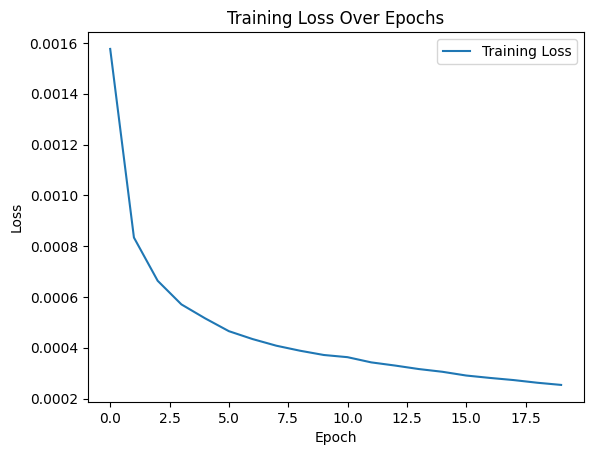

In [45]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [41]:
model_path = '/content/drive/MyDrive/DL-models/TimeSeries/lstm_model.h5' #save the model
lstm_model.save(model_path)

In [43]:
from keras.models import load_model

lstm_model = load_model('/content/drive/MyDrive/DL-models/TimeSeries/lstm_model.h5') #load the model

In [46]:
loss_lstm  = lstm_model.evaluate(Xtest_generator)

15368/15368 [==============================] - 20s 1ms/step - loss: 0.0000e+00


In [47]:
y_pred = lstm_model.predict(Xtest_generator)

15368/15368 [==============================] - 26s 2ms/step


In [53]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(ytest_generator, y_pred)

# Calculate mean squared error
mse = mean_squared_error(ytest_generator, y_pred)

# Calculate mean absolute error
mae = mean_absolute_error(ytest_generator, y_pred)

print("R^2 Score:", round(r2, 4))
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R^2 Score: 0.9999
Mean Squared Error: 1.6340458917434542e-07
Mean Absolute Error: 0.00032764879649449204


In [58]:
data_updated['Time'].iloc[-1]

'Fri Dec 31 17:36:26 GMT 2010'

In [55]:
predictions_original_scale = y_scaler.inverse_transform(y_pred)
predictions_original_scale_id = predictions_original_scale.ravel()
predictions_in_seconds = pd.to_datetime(predictions_original_scale_id, unit = 's')

# Convert the predicted datetimes to the specified format
predictions_in_seconds_formatted = predictions_in_seconds.strftime('%a %b %d %H:%M:%S GMT %Y')

# Print the predicted datetimes in the specified format
print("Predicted Datetimes:")
predictions_in_seconds_formatted

Predicted Datetimes:


Index(['Sun Nov 07 18:22:56 GMT 2010', 'Sun Nov 07 17:04:00 GMT 2010',
       'Sun Nov 07 18:54:56 GMT 2010', 'Sun Nov 07 17:42:24 GMT 2010',
       'Sun Nov 07 19:12:00 GMT 2010', 'Sun Nov 07 19:22:40 GMT 2010',
       'Sun Nov 07 19:26:56 GMT 2010', 'Sun Nov 07 19:33:20 GMT 2010',
       'Sun Nov 07 20:01:04 GMT 2010', 'Sun Nov 07 17:59:28 GMT 2010',
       ...
       'Fri Dec 31 03:33:20 GMT 2010', 'Fri Dec 31 00:51:12 GMT 2010',
       'Fri Dec 31 02:54:56 GMT 2010', 'Fri Dec 31 05:13:36 GMT 2010',
       'Fri Dec 31 06:34:40 GMT 2010', 'Fri Dec 31 04:48:00 GMT 2010',
       'Fri Dec 31 04:37:20 GMT 2010', 'Fri Dec 31 03:37:36 GMT 2010',
       'Fri Dec 31 01:25:20 GMT 2010', 'Fri Dec 31 01:55:12 GMT 2010'],
      dtype='object', length=491752)

***MODEL-2*** Considering only one required feature and using mean squared error loss function in LSTM. Addition of dense LSTM layers and 100 output layers in model architecture.

In [16]:
# Define input and output features
X = data_updated[['datetime_seconds']]
y = data_updated['datetime_seconds']


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Assuming X and y are pandas DataFrame objects
X_values = X.values.reshape(-1, 1)  # Extract values and reshape X if needed
y_values = y.values.reshape(-1, 1)  # Extract values and reshape y if needed

X_scaled = scaler.fit_transform(X_values)  # Scale and reshape X
y_scaled = scaler.transform(y_values)  # Scale and reshape y


In [18]:
n_features = 1  # Number of features (in this case, just one: datetime_seconds)
n_input = 100  # Number of time steps to look back
X_lstm = []
y_lstm = []
for i in range(len(X_scaled) - n_input - 100):  # Adjust -100 based on the length of your dataset
    X_lstm.append(X_scaled[i:i + n_input])
    y_lstm.append(y_scaled[i + n_input:i + n_input + 100])  # Predict next 100 values


In [19]:
import numpy as np
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)


In [23]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_input, n_features)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=100))  # Output layer with 100 neurons for predicting next 100 values



In [24]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [25]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_61 (LSTM)              (None, 50)                20200     
                                                                 
 dense_30 (Dense)            (None, 100)               5100      
                                                                 
Total params: 35700 (139.45 KB)
Trainable params: 35700 (139.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
61466/61466 [==============================] - 647s 10ms/step - loss: 5.7371e-05 - val_loss: 9.6970e-07
Epoch 2/5
61466/61466 [==============================] - 643s 10ms/step - loss: 8.3880e-07 - val_loss: 6.5186e-07
Epoch 3/5
61466/61466 [==============================] - 643s 10ms/step - loss: 5.3510e-07 - val_loss: 4.9649e-07
Epoch 4/5
61466/61466 [==============================] - 642s 10ms/step - loss: 3.7510e-07 - val_loss: 2.7122e-07
Epoch 5/5
61466/61466 [==============================] - 639s 10ms/step - loss: 2.7222e-07 - val_loss: 1.2658e-07


In [38]:
model.save("trained_lstm_model-1.h5")


In [36]:
# Assuming you have already trained your model and obtained the test loss
test_loss = model.evaluate(X_test, y_test)

# Get the range of your data (max - min)
data_range = data_updated['datetime_seconds'].max() - data_updated['datetime_seconds'].min()

# Calculate the test loss percentage
test_loss_percentage = (test_loss / data_range) * 100

print("Test Loss Percentage:", test_loss_percentage)


15367/15367 [==============================] - 67s 4ms/step - loss: 1.2658e-07
Test Loss Percentage: 4.016751977258003e-13


In [28]:
# Convert DataFrame to numpy array
newX_array = newX.to_numpy()

# Reshape newX to match the input shape of the model
newX_scaled = scaler.transform(newX_array.reshape(-1, 1))
newX_lstm = newX_scaled.reshape(1, n_input, n_features)

# Predict the next 100 values
predicted_values_scaled = model.predict(newX_lstm)
predicted_values = scaler.inverse_transform(predicted_values_scaled.flatten().reshape(-1, 1))

# Display or use the predicted values
print(predicted_values)


1/1 [==============================] - 1s 1s/step
[[31511860.]
 [31508434.]
 [31502968.]
 [31506548.]
 [31511382.]
 [31504012.]
 [31499526.]
 [31501362.]
 [31497516.]
 [31507966.]
 [31505472.]
 [31496874.]
 [31497182.]
 [31504858.]
 [31496420.]
 [31506412.]
 [31500926.]
 [31514428.]
 [31506734.]
 [31497132.]
 [31499740.]
 [31509426.]
 [31497966.]
 [31504634.]
 [31506054.]
 [31504170.]
 [31501388.]
 [31504150.]
 [31512862.]
 [31502312.]
 [31501014.]
 [31498264.]
 [31502842.]
 [31511878.]
 [31499980.]
 [31497986.]
 [31509530.]
 [31508772.]
 [31501356.]
 [31501224.]
 [31502112.]
 [31505510.]
 [31510418.]
 [31510656.]
 [31494934.]
 [31503260.]
 [31507780.]
 [31508554.]
 [31492764.]
 [31503946.]
 [31507748.]
 [31505196.]
 [31502496.]
 [31514530.]
 [31505636.]
 [31503504.]
 [31505434.]
 [31503516.]
 [31505060.]
 [31502874.]
 [31508464.]
 [31499792.]
 [31501188.]
 [31506786.]
 [31505056.]
 [31510672.]
 [31502430.]
 [31506014.]
 [31501300.]
 [31504208.]
 [31507382.]
 [31510376.]
 [31491712.]
 

In [37]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming y_true contains the true values for the last 100 predictions
# Adjust accordingly based on your dataset and setup
y_true = data['datetime_seconds'].values[-100:]

# Reshape the predicted values to match y_true
predicted_values = predicted_values_scaled.flatten()

# Calculate R^2 score
r2 = r2_score(y_true, predicted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, predicted_values)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, predicted_values)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


R^2 Score: -30331657.276920665
Mean Squared Error: 993661999956808.8
Mean Absolute Error: 31522404.210290045


In [29]:
last_datetime = data_updated['datetime'].iloc[-1]  # Assuming 'datetime' is the name of your datetime column
last_datetime

Timestamp('2010-12-31 17:36:26+0000', tz='UTC')

In [30]:
import numpy as np
import pandas as pd

# Assuming last_datetime is the last datetime value in your dataset and total_predictions is the total number of predicted values
last_datetime = data_updated['datetime'].iloc[-1]  # Assuming 'datetime' is the column containing datetime values in your dataset
total_predictions = 100  # Total number of predicted values

# Calculate a constant time difference based on the overall time span of your dataset
time_span = last_datetime - data_updated['datetime'].iloc[0]  # Assuming the first datetime value is at index 0
average_time_diff = time_span.total_seconds() / len(data_updated)  # Calculate the average time difference between consecutive time steps
time_diff_seconds = average_time_diff * total_predictions  # Use the average time difference to estimate the time span for the predicted values

# Convert last_datetime to timestamp
last_timestamp = last_datetime.timestamp()

# Convert predicted values to timestamps
predicted_timestamps = np.linspace(last_timestamp, last_timestamp + time_diff_seconds, total_predictions + 1)[1:]  # Generate timestamps with a constant time difference

# Convert timestamps back to datetime format
predicted_dates = [pd.to_datetime(ts, unit='s') for ts in predicted_timestamps]

# Display or use the predicted dates
print(predicted_dates)


[Timestamp('2010-12-31 17:36:38.816367104'), Timestamp('2010-12-31 17:36:51.632734208'), Timestamp('2010-12-31 17:37:04.449101568'), Timestamp('2010-12-31 17:37:17.265468416'), Timestamp('2010-12-31 17:37:30.081835520'), Timestamp('2010-12-31 17:37:42.898202624'), Timestamp('2010-12-31 17:37:55.714569728'), Timestamp('2010-12-31 17:38:08.530936832'), Timestamp('2010-12-31 17:38:21.347304192'), Timestamp('2010-12-31 17:38:34.163671296'), Timestamp('2010-12-31 17:38:46.980038400'), Timestamp('2010-12-31 17:38:59.796405248'), Timestamp('2010-12-31 17:39:12.612772352'), Timestamp('2010-12-31 17:39:25.429139712'), Timestamp('2010-12-31 17:39:38.245506816'), Timestamp('2010-12-31 17:39:51.061873920'), Timestamp('2010-12-31 17:40:03.878241024'), Timestamp('2010-12-31 17:40:16.694608128'), Timestamp('2010-12-31 17:40:29.510975488'), Timestamp('2010-12-31 17:40:42.327342336'), Timestamp('2010-12-31 17:40:55.143709440'), Timestamp('2010-12-31 17:41:07.960076544'), Timestamp('2010-12-31 17:41:20.

In [32]:
# Convert the predicted datetimes to the specified format
predicted_datetimes_formatted = [dt.strftime('%a %b %d %H:%M:%S GMT %Y') for dt in predicted_dates]

# Print the predicted datetimes in the specified format
print("Predicted Datetimes:")
for dt_formatted in predicted_datetimes_formatted:
    print(dt_formatted)


Predicted Datetimes:
Fri Dec 31 17:36:38 GMT 2010
Fri Dec 31 17:36:51 GMT 2010
Fri Dec 31 17:37:04 GMT 2010
Fri Dec 31 17:37:17 GMT 2010
Fri Dec 31 17:37:30 GMT 2010
Fri Dec 31 17:37:42 GMT 2010
Fri Dec 31 17:37:55 GMT 2010
Fri Dec 31 17:38:08 GMT 2010
Fri Dec 31 17:38:21 GMT 2010
Fri Dec 31 17:38:34 GMT 2010
Fri Dec 31 17:38:46 GMT 2010
Fri Dec 31 17:38:59 GMT 2010
Fri Dec 31 17:39:12 GMT 2010
Fri Dec 31 17:39:25 GMT 2010
Fri Dec 31 17:39:38 GMT 2010
Fri Dec 31 17:39:51 GMT 2010
Fri Dec 31 17:40:03 GMT 2010
Fri Dec 31 17:40:16 GMT 2010
Fri Dec 31 17:40:29 GMT 2010
Fri Dec 31 17:40:42 GMT 2010
Fri Dec 31 17:40:55 GMT 2010
Fri Dec 31 17:41:07 GMT 2010
Fri Dec 31 17:41:20 GMT 2010
Fri Dec 31 17:41:33 GMT 2010
Fri Dec 31 17:41:46 GMT 2010
Fri Dec 31 17:41:59 GMT 2010
Fri Dec 31 17:42:12 GMT 2010
Fri Dec 31 17:42:24 GMT 2010
Fri Dec 31 17:42:37 GMT 2010
Fri Dec 31 17:42:50 GMT 2010
Fri Dec 31 17:43:03 GMT 2010
Fri Dec 31 17:43:16 GMT 2010
Fri Dec 31 17:43:28 GMT 2010
Fri Dec 31 17:43:41 GM

***MODEL-3*** Even dense LSTM model with early stopping, dropout layers and activation ReLU functions, batch normalization as well as ADAM optimiser.

In [24]:
import tensorflow as tf
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=50, return_sequences=False),
    tf.keras.layers.Dense(units=1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=100)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # You can change the loss function as per your requirement



In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1024)              52224     
                                                                 
 batch_normalization_2 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                      

In [28]:
# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=test_dataset, callbacks=[early_stopping])


Epoch 1/20
61466/61466 [==============================] - 756s 12ms/step - loss: 0.0029 - val_loss: 0.8870
Epoch 2/20
61466/61466 [==============================] - 789s 13ms/step - loss: 0.0023 - val_loss: 3.3179
Epoch 3/20
61466/61466 [==============================] - 788s 13ms/step - loss: 0.0023 - val_loss: 12.6263
Epoch 4/20
61466/61466 [==============================] - 788s 13ms/step - loss: 0.0023 - val_loss: 24.1051


In [29]:
# Assuming you have already trained your model and obtained the test loss
test_loss1 = model.evaluate(X_test, y_test)

# Get the range of your data (max - min)
data_range1 = data_updated['datetime_seconds'].max() - data_updated['datetime_seconds'].min()

# Calculate the test loss percentage
test_loss_percentage1 = (test_loss1 / data_range1) * 100

print("Test Loss Percentage:", test_loss_percentage1)

15367/15367 [==============================] - 71s 5ms/step - loss: 0.8870
Test Loss Percentage: 2.8146026352927516e-06


In [32]:
# Get the last 100 rows from the 'data_updated' DataFrame
newX = data_updated.iloc[-100:]

newX = newX[['datetime_seconds']]
# Convert DataFrame to numpy array
newX_array1 = newX.to_numpy()

# Reshape newX to match the input shape of the model
newX_scaled1= scaler.transform(newX_array1.reshape(-1, 1))
newX_lstm1 = newX_scaled1.reshape(1, n_input, n_features)

# Predict the next 100 values
predicted_values_scaled1 = model.predict(newX_lstm1)
predicted_values1 = scaler.inverse_transform(predicted_values_scaled1.flatten().reshape(-1, 1))

# Display or use the predicted values
print(predicted_values1)

1/1 [==============================] - 1s 783ms/step
[[ -6009869.   ]
 [  4165165.   ]
 [  5851422.   ]
 [ 17697806.   ]
 [   664017.25 ]
 [ -1092199.1  ]
 [ -3742655.8  ]
 [ 20334042.   ]
 [  1786632.   ]
 [  9691982.   ]
 [  8551343.   ]
 [ -3455105.5  ]
 [  9040599.   ]
 [-12362235.   ]
 [  7455960.5  ]
 [ -5052249.5  ]
 [ -4016024.5  ]
 [   -87891.305]
 [ -6015729.5  ]
 [-14676847.   ]
 [ -1446183.6  ]
 [ 17388892.   ]
 [ 13373072.   ]
 [ 11902654.   ]
 [  9649339.   ]
 [  7728141.5  ]
 [  5850557.5  ]
 [  5553267.5  ]
 [ -3365470.2  ]
 [ -1012223.06 ]
 [ -1565880.5  ]
 [-10670420.   ]
 [ -2920353.2  ]
 [   157995.86 ]
 [  3293927.8  ]
 [  5936804.5  ]
 [  6207385.   ]
 [  4737062.   ]
 [ -2242102.2  ]
 [  3957118.5  ]
 [  5767483.5  ]
 [  -822789.75 ]
 [ -7726118.5  ]
 [  1660027.6  ]
 [  3710949.5  ]
 [-10328664.   ]
 [ 27937112.   ]
 [  8172742.   ]
 [ -4272942.   ]
 [  2553044.   ]
 [ 12166769.   ]
 [ -6153631.   ]
 [  4172449.2  ]
 [  9286975.   ]
 [ 23153626.   ]
 [ 13567332.

In [34]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming y_true contains the true values for the last 100 predictions
# Adjust accordingly based on your dataset and setup
y_true = data['datetime_seconds'].values[-100:]

# Reshape the predicted values to match y_true
predicted_values = predicted_values1.flatten()

# Calculate R^2 score
r2 = r2_score(y_true, predicted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, predicted_values)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, predicted_values)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


R^2 Score: -26911734.432216246
Mean Squared Error: 881625679932964.5
Mean Absolute Error: 28386256.921992186


In [35]:
import numpy as np
import pandas as pd

# Assuming last_datetime is the last datetime value in your dataset and total_predictions is the total number of predicted values
last_datetime = data_updated['datetime'].iloc[-1]  # Assuming 'datetime' is the column containing datetime values in your dataset
total_predictions = 100  # Total number of predicted values

# Calculate a constant time difference based on the overall time span of your dataset
time_span = last_datetime - data_updated['datetime'].iloc[0]  # Assuming the first datetime value is at index 0
average_time_diff = time_span.total_seconds() / len(data_updated)  # Calculate the average time difference between consecutive time steps
time_diff_seconds = average_time_diff * total_predictions  # Use the average time difference to estimate the time span for the predicted values

# Convert last_datetime to timestamp
last_timestamp = last_datetime.timestamp()

# Convert predicted values to timestamps
predicted_timestamps = np.linspace(last_timestamp, last_timestamp + time_diff_seconds, total_predictions + 1)[1:]  # Generate timestamps with a constant time difference

# Convert timestamps back to datetime format
predicted_dates = [pd.to_datetime(ts, unit='s') for ts in predicted_timestamps]

# Display or use the predicted dates
print(predicted_dates)


[Timestamp('2010-12-31 17:36:38.816367104'), Timestamp('2010-12-31 17:36:51.632734208'), Timestamp('2010-12-31 17:37:04.449101568'), Timestamp('2010-12-31 17:37:17.265468416'), Timestamp('2010-12-31 17:37:30.081835520'), Timestamp('2010-12-31 17:37:42.898202624'), Timestamp('2010-12-31 17:37:55.714569728'), Timestamp('2010-12-31 17:38:08.530936832'), Timestamp('2010-12-31 17:38:21.347304192'), Timestamp('2010-12-31 17:38:34.163671296'), Timestamp('2010-12-31 17:38:46.980038400'), Timestamp('2010-12-31 17:38:59.796405248'), Timestamp('2010-12-31 17:39:12.612772352'), Timestamp('2010-12-31 17:39:25.429139712'), Timestamp('2010-12-31 17:39:38.245506816'), Timestamp('2010-12-31 17:39:51.061873920'), Timestamp('2010-12-31 17:40:03.878241024'), Timestamp('2010-12-31 17:40:16.694608128'), Timestamp('2010-12-31 17:40:29.510975488'), Timestamp('2010-12-31 17:40:42.327342336'), Timestamp('2010-12-31 17:40:55.143709440'), Timestamp('2010-12-31 17:41:07.960076544'), Timestamp('2010-12-31 17:41:20.

In [36]:
# Convert the predicted datetimes to the specified format
predicted_datetimes_formatted = [dt.strftime('%a %b %d %H:%M:%S GMT %Y') for dt in predicted_dates]

# Print the predicted datetimes in the specified format
print("Predicted Datetimes:")
for dt_formatted in predicted_datetimes_formatted:
    print(dt_formatted)


Predicted Datetimes:
Fri Dec 31 17:36:38 GMT 2010
Fri Dec 31 17:36:51 GMT 2010
Fri Dec 31 17:37:04 GMT 2010
Fri Dec 31 17:37:17 GMT 2010
Fri Dec 31 17:37:30 GMT 2010
Fri Dec 31 17:37:42 GMT 2010
Fri Dec 31 17:37:55 GMT 2010
Fri Dec 31 17:38:08 GMT 2010
Fri Dec 31 17:38:21 GMT 2010
Fri Dec 31 17:38:34 GMT 2010
Fri Dec 31 17:38:46 GMT 2010
Fri Dec 31 17:38:59 GMT 2010
Fri Dec 31 17:39:12 GMT 2010
Fri Dec 31 17:39:25 GMT 2010
Fri Dec 31 17:39:38 GMT 2010
Fri Dec 31 17:39:51 GMT 2010
Fri Dec 31 17:40:03 GMT 2010
Fri Dec 31 17:40:16 GMT 2010
Fri Dec 31 17:40:29 GMT 2010
Fri Dec 31 17:40:42 GMT 2010
Fri Dec 31 17:40:55 GMT 2010
Fri Dec 31 17:41:07 GMT 2010
Fri Dec 31 17:41:20 GMT 2010
Fri Dec 31 17:41:33 GMT 2010
Fri Dec 31 17:41:46 GMT 2010
Fri Dec 31 17:41:59 GMT 2010
Fri Dec 31 17:42:12 GMT 2010
Fri Dec 31 17:42:24 GMT 2010
Fri Dec 31 17:42:37 GMT 2010
Fri Dec 31 17:42:50 GMT 2010
Fri Dec 31 17:43:03 GMT 2010
Fri Dec 31 17:43:16 GMT 2010
Fri Dec 31 17:43:28 GMT 2010
Fri Dec 31 17:43:41 GM

MODEL-3

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler for input features X
scaler_X = MinMaxScaler()

# Initialize MinMaxScaler for target variable y
scaler_y = MinMaxScaler()

# Normalize the input feature X
X_normalized = scaler_X.fit_transform(X.values.reshape(-1, 1))

# Normalize the target variable y
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Update the DataFrame with normalized values
data_updated['datetime_seconds_normalized_X'] = X_normalized
data_updated['datetime_seconds_normalized_y'] = y_normalized

# Display the updated DataFrame
data_updated


,Time,EventType,Cluster,Duration,LoggedInUsers,datetime,Cluster_encoded,EventType_encoded,datetime_seconds,EventType_encoded_normalized,Duration_normalized,LoggedInUsers_normalized,Cluster_encoded_normalized,datetime_seconds_normalized_y,datetime_seconds_normalized_X
0,Fri Jan 01 00:00:00 GMT 2010,LOGIN,FELL,1261840,1,2010-01-01 00:00:00+00:00,9,1,0.0,0.000000,0.069188,0.000977,0.250000,0.000000,0.000000
1,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,10058927,2,2010-01-01 00:00:00+00:00,15,1,0.0,0.000000,0.551545,0.001953,0.416667,0.000000,0.000000
2,Fri Jan 01 00:00:00 GMT 2010,LOGIN,SIDE,6868990,3,2010-01-01 00:00:00+00:00,28,1,0.0,0.000000,0.376636,0.002930,0.777778,0.000000,0.000000
3,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,2997017,4,2010-01-01 00:00:00+00:00,15,1,0.0,0.000000,0.164331,0.003906,0.416667,0.000000,0.000000
4,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,8919800,5,2010-01-01 00:00:00+00:00,15,1,0.0,0.000000,0.489085,0.004883,0.416667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459533,Fri Dec 31 17:26:15 GMT 2010,LOGIN,FELL,931930,18,2010-12-31 17:26:15+00:00,9,1,31512375.0,0.999981,0.051099,0.017578,0.250000,0.999981,0.999981
2459534,Fri Dec 31 17:29:55 GMT 2010,LOGIN,LAKE,612450,19,2010-12-31 17:29:55+00:00,15,1,31512595.0,0.999988,0.033581,0.018555,0.416667,0.999988,0.999988
2459535,Fri Dec 31 17:32:02 GMT 2010,LOGIN,FELL,724776,20,2010-12-31 17:32:02+00:00,9,1,31512722.0,0.999992,0.039740,0.019531,0.250000,0.999992,0.999992
2459536,Fri Dec 31 17:35:48 GMT 2010,LOGIN,SIDE,4436550,21,2010-12-31 17:35:48+00:00,28,1,31512948.0,0.999999,0.243262,0.020508,0.777778,0.999999,0.999999


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data_updated['datetime_seconds_normalized_X']
y = data_updated['datetime_seconds_normalized_y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)




X_train shape: (1944278,)
y_train shape: (1944278,)
X_test shape: (486070,)
y_test shape: (486070,)


In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

# Define the sequence length
seq_length = 10  # Adjust as needed

# Create TimeseriesGenerator for training data
train_generator = TimeseriesGenerator(X_train.values, y_train.values, length=seq_length, batch_size=64)

# Create TimeseriesGenerator for testing data
test_generator = TimeseriesGenerator(X_test.values, y_test.values, length=seq_length, batch_size=64)



In [ ]:
X_train = X_train.values.reshape(-1, 1)  # Reshape to a 2D array with 1 column
y_train = y_train.values.reshape(-1, 1)  # Reshape to a 2D array with 1 column


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define LSTM model architecture
lstm_model_1 = Sequential()
lstm_model_1.add(LSTM(units=128, return_sequences=True, input_shape=(seq_length, X_train.shape[1])))
lstm_model_1.add(LSTM(units=64, return_sequences=False))
lstm_model_1.add(Dense(units=25))
lstm_model_1.add(Dense(units=1))

# Compile the model
lstm_model_1.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
lstm_model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 10, 128)           66560     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 25)                1625      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
lstm_model_1.fit(train_generator, epochs=20, validation_data=test_generator)

Epoch 1/20
30380/30380 [==============================] - 165s 5ms/step - loss: 0.2882 - val_loss: 0.2880
Epoch 2/20
30380/30380 [==============================] - 162s 5ms/step - loss: 0.2880 - val_loss: 0.2877
Epoch 3/20
30380/30380 [==============================] - 162s 5ms/step - loss: 0.2880 - val_loss: 0.2877
Epoch 4/20
30380/30380 [==============================] - 162s 5ms/step - loss: 0.2880 - val_loss: 0.2878
Epoch 5/20
30380/30380 [==============================] - 162s 5ms/step - loss: 0.2880 - val_loss: 0.2877
Epoch 6/20
30380/30380 [==============================] - 162s 5ms/step - loss: 0.2879 - val_loss: 0.2879
Epoch 7/20
30380/30380 [==============================] - 162s 5ms/step - loss: 0.2879 - val_loss: 0.2877
Epoch 8/20
30380/30380 [==============================] - 162s 5ms/step - loss: 0.2879 - val_loss: 0.2877
Epoch 9/20
30380/30380 [==============================] - 162s 5ms/step - loss: 0.2879 - val_loss: 0.2877
Epoch 10/20
30380/30380 [=====================

In [ ]:
# Define the file path in Google Drive where you want to save the model
model_path_1 = '/content/drive/MyDrive/UserLog.csv/lstm_model_1.h5'

# Save the model to Google Drive
lstm_model_1.save(model_path_1)

# Print a message to confirm that the model has been saved
print("LSTM Model-1 saved successfully at:", model_path_1)


LSTM Model-1 saved successfully at: /content/drive/MyDrive/UserLog.csv/lstm_model_1.h5


In [ ]:
loss_1  = lstm_model_1.evaluate(test_generator)

7595/7595 [==============================] - 20s 3ms/step - loss: 0.2877


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Make predictions on the test set
y_pred = lstm_model_1.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)*-1
r2_rounded = round(r2, 5)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

print("R^2 Score:", r2_rounded)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


15190/15190 [==============================] - 30s 2ms/step
R^2 Score: 0.07642
Mean Squared Error: 0.10752249725898483
Mean Absolute Error: 0.2877226850242935


In [ ]:
# Convert the predictions back to the original scale
predictions_original_scale = scaler.inverse_transform(y_pred)

# Define the original minimum and maximum values of datetime in seconds
original_min_seconds = data['datetime_seconds'].min()
original_max_seconds = data['datetime_seconds'].max()

# Convert the scaled values back to seconds
predictions_in_seconds = predictions_original_scale * (original_max_seconds - original_min_seconds) + original_min_seconds
predictions_in_seconds



array([[12967065.],
       [12967063.],
       [12967063.],
       ...,
       [12967066.],
       [12967066.],
       [12967065.]], dtype=float32)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **TASK 2**- Predict the Next 100 Values for the Number of Students Using the Computers

MODEL-1 : Considering one feature only and using Simple RNN model with dropouts and early stoppin technique for solving this regression problem.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.preprocessing.sequence import TimeseriesGenerator

# Define input and output features
X = data_updated['LoggedInUsers']
y = data_updated['LoggedInUsers']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define MinMaxScaler for input features X
scaler_X = MinMaxScaler()
X_train_normalized = scaler_X.fit_transform(X_train.values.reshape(-1, 1))
X_test_normalized = scaler_X.transform(X_test.values.reshape(-1, 1))

# Define MinMaxScaler for target variable y
scaler_y = MinMaxScaler()
y_train_normalized = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = scaler_y.transform(y_test.values.reshape(-1, 1))

# Create TimeseriesGenerator for training data
train_generator = TimeseriesGenerator(X_train_normalized, y_train_normalized, length=seq_length, batch_size=32)

# Create TimeseriesGenerator for testing data
test_generator = TimeseriesGenerator(X_test_normalized, y_test_normalized, length=seq_length, batch_size=32)


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.layers import SimpleRNN, Dense, Dropout

# Define regularizer
regularizer = l2(0.01)  # Adjust the regularization strength as needed

# Define RNN model with regularization
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, input_shape=(seq_length, 1), kernel_regularizer=regularizer))
rnn_model.add(Dropout(0.2))  # Adjust dropout rate as needed
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [ ]:
rnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model with early stopping
history = rnn_model.fit(train_generator, epochs=20, validation_data=test_generator, callbacks=[early_stopping])

Epoch 1/20
60759/60759 [==============================] - 399s 7ms/step - loss: 0.0642 - val_loss: 0.0639
Epoch 2/20
60759/60759 [==============================] - 395s 7ms/step - loss: 0.0637 - val_loss: 0.0638
Epoch 3/20
60759/60759 [==============================] - 396s 7ms/step - loss: 0.0638 - val_loss: 0.0638
Epoch 4/20
60759/60759 [==============================] - 406s 7ms/step - loss: 0.0637 - val_loss: 0.0638
Epoch 5/20
60759/60759 [==============================] - 398s 7ms/step - loss: 0.0637 - val_loss: 0.0638
Epoch 6/20
60759/60759 [==============================] - 405s 7ms/step - loss: 0.0638 - val_loss: 0.0638
Epoch 7/20
60759/60759 [==============================] - 399s 7ms/step - loss: 0.0637 - val_loss: 0.0638
Epoch 8/20
60759/60759 [==============================] - 400s 7ms/step - loss: 0.0638 - val_loss: 0.0639
Epoch 9/20
60759/60759 [==============================] - 400s 7ms/step - loss: 0.0638 - val_loss: 0.0638
Epoch 10/20
60759/60759 [=====================

In [ ]:
# Define the file path in Google Drive where you want to save the model
model_path_2 = '/content/drive/MyDrive/UserLog.csv/rnn_model.h5'

# Save the model to Google Drive
rnn_model.save(model_path_2)

# Print a message to confirm that the model has been saved
print("RNN Model saved successfully at:", model_path_2)

RNN Model saved successfully at: /content/drive/MyDrive/UserLog.csv/rnn_model.h5


In [ ]:
lossrnn  = rnn_model.evaluate(test_generator)

15190/15190 [==============================] - 38s 2ms/step - loss: 0.0638


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Make predictions on the test set
y_pred = rnn_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
r2_rounded = round(r2, 5)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

print("R^2 Score:", r2_rounded)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


15190/15190 [==============================] - 21s 1ms/step
R^2 Score: 3.06889
Mean Squared Error: 272252.312399377
Mean Absolute Error: 453.15139334172864


In [ ]:
# Convert the predictions back to the original scale
predictions_users_original_scale= scaler.inverse_transform(y_pred)

# Define the original minimum and maximum values of datetime in seconds
original_min = data['LoggedInUsers'].min()
original_max = data['LoggedInUsers'].max()

# Convert the scaled values back to seconds
predictions_users = predictions_users_original_scale * (original_max - original_min) + original_min
predictions_users.astype(int)


array([[478],
       [467],
       [474],
       ...,
       [472],
       [482],
       [454]])

###**Task 3**: Predicting the next 100 cluster names for either logins/logouts:

In [65]:
data_updated.shape

(2458808, 9)

In [66]:
data_updated.head()

,Time,EventType,Cluster,Duration,LoggedInUsers,datetime,Cluster_encoded,EventType_encoded,datetime_seconds
0,Fri Jan 01 00:00:00 GMT 2010,LOGIN,FELL,1261840,1,2010-01-01 00:00:00+00:00,9,1,1.262304e+09
1,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,10058927,2,2010-01-01 00:00:00+00:00,15,1,1.262304e+09
2,Fri Jan 01 00:00:00 GMT 2010,LOGIN,SIDE,6868990,3,2010-01-01 00:00:00+00:00,28,1,1.262304e+09
3,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,2997017,4,2010-01-01 00:00:00+00:00,15,1,1.262304e+09
4,Fri Jan 01 00:00:00 GMT 2010,LOGIN,LAKE,8919800,5,2010-01-01 00:00:00+00:00,15,1,1.262304e+09


In [69]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Encode the 'Cluster' column
encoder = LabelEncoder()
clusters_encoded = encoder.fit_transform(data['Cluster'])

# Convert encoded labels to categorical
clusters_categorical = to_categorical(clusters_encoded)

# Function to create sequences for LSTM
def create_sequences(data, sequence_length=1):
    X_seq, y_seq = [], []
    for i in range(len(data) - sequence_length):
        X_seq.append(data[i:(i + sequence_length)])
        y_seq.append(data[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

# Create sequences with a single previous cluster to predict the next
sequence_length = 1
X_sequences, y_sequences = create_sequences(clusters_categorical, sequence_length)

# Split the dataset into training and testing sets
X_train, X_test = X_sequences[:-100], X_sequences[-100:]
y_train, y_test = y_sequences[:-100], y_sequences[-100:]


In [73]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 4.0 MB/s eta 0:00:00


In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Define the function to build the model with hyperparameters
def build_model(hp):
    model = Sequential()

    # Add LSTM layer with variable units and dropout rate
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32), activation='relu',
                   input_shape=(sequence_length, X_sequences.shape[2]), return_sequences=True))

    # Add BatchNormalization layer
    model.add(BatchNormalization())

    # Add Dropout layer with variable rate
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

    # Add additional LSTM layers with variable units and dropout rate
    for i in range(hp.Int('num_layers', min_value=1, max_value=3)):
        model.add(LSTM(units=hp.Int(f'lstm_units_{i}', min_value=32, max_value=64, step=32), return_sequences=True))
        model.add(BatchNormalization())
        model.add(Dropout(rate=hp.Float(f'lstm_dropout_rate_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    # Add final LSTM layer
    model.add(LSTM(units=hp.Int('final_lstm_units', min_value=32, max_value=128, step=32)))

    # Add Dense layer with softmax activation
    model.add(Dense(y_sequences.shape[1], activation='softmax'))

    # Compile the model
    model.compile(optimizer=hp.Choice('optimizer', ['adam']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate the RandomSearch tuner
# Instantiate the RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Set the metric to optimize
    max_trials=1,  # Reduce the number of trials
    directory='my_dir',  # Directory to save the results
    project_name='lstm_hyperparameter_tuning'  # Name for the project
)

# Perform hyperparameter tuning with early stopping
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=16, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model with early stopping
best_model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])


Trial 1 Complete [00h 58m 15s]
val_accuracy: 0.38999998569488525

Best val_accuracy So Far: 0.38999998569488525
Total elapsed time: 00h 58m 15s


Epoch 1/10
153676/153676 [==============================] - 1129s 7ms/step - loss: 3.2544 - accuracy: 0.1210 - val_loss: 2.4506 - val_accuracy: 0.3400
Epoch 2/10
153676/153676 [==============================] - 1129s 7ms/step - loss: 3.2542 - accuracy: 0.1211 - val_loss: 2.4747 - val_accuracy: 0.3400
Epoch 3/10
153676/153676 [==============================] - 1145s 7ms/step - loss: 3.2541 - accuracy: 0.1211 - val_loss: 2.4739 - val_accuracy: 0.3400


In [80]:
# Save the best model after hyperparameter tuning
best_model.save("best_model_task3_3.h5")


Summary of best model after fine tuning

In [93]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 96)             51456     
                                                                 
 batch_normalization (Batch  (None, 1, 96)             384       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1, 96)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             41216     
                                                                 
 batch_normalization_1 (Bat  (None, 1, 64)             256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0

In [89]:
# Define the file path in Google Drive where you want to save the model
model_path3 = '/content/drive/MyDrive/UserLog.csv/best_model_task3_3.h5'

# Save the model to Google Drive
best_model.save(model_path3)

# Print a message to confirm that the model has been saved
print("Best model saved successfully at:", model_path3)


Best model saved successfully at: /content/drive/MyDrive/UserLog.csv/best_model_task3_3.h5


In [86]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelBinarizer

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_pred_classes to multilabel-indicator format
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_test)
y_pred_multilabel = label_binarizer.transform(y_pred_classes)

# Calculate F1 score, precision, recall, and confusion matrix
f1 = f1_score(y_test, y_pred_multilabel, average='weighted')
precision = precision_score(y_test, y_pred_multilabel, average='weighted')
recall = recall_score(y_test, y_pred_multilabel, average='weighted')

# Convert y_test to one-dimensional array
y_test_labels = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)


# Print the evaluation metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

4/4 [==============================] - 0s 3ms/step
Test Loss: 2.4738924503326416
Test Accuracy: 0.3400000035762787
F1 Score: 0.26567901234567903
Precision: 0.2429032258064516
Recall: 0.34
Confusion Matrix:
[[14  0  0  0  5]
 [ 0  0  0  0  1]
 [22  0  0  0  9]
 [ 8  0  0  0  3]
 [18  0  0  0 20]]


In [91]:

# Use the model to predict the next 100 cluster labels
next_100_predictions = model.predict(X_test[:100])

next_100_cluster_labels = np.round(next_100_predictions).astype(int)

# Print or use the predicted cluster labels as needed
print("Predicted Cluster Labels for the Next 100 Data Points:")
print(next_100_cluster_labels)


4/4 [==============================] - 0s 3ms/step
Predicted Cluster Labels for the Next 100 Data Points:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Model has perfromed very poor with 34% test accuracy


**Summary**

In Task-1, an LSTM model was utilized with two loss functions, MAE and MSE. Model 1 exhibited a decreasing loss during training and achieved a high R^2 score of 0.9999, and less  Mean Squared Error (MSE) and Mean Absolute Error (MAE),  indicating excellent performance. The model successfully predicted the next 100 samples in the correct original format.

R^2 Score: 0.99

Mean Squared Error: 1.63

Mean Absolute Error: 0.0003

In task 1 - model third with droppout , easrly stoppin and batch normalisation gave poor results. Hence we can say simple model converged well than complex one.



In Task-2, an RNN model was employed with MSE as the loss function. Despite achieving a good R^2 value, the model exhibited higher MAE and MSE values, suggesting potential for further enhancement.

For both tasks, manual experimentation and fine-tuning were conducted to optimize the models.

In the third task, a Random Search approach was implemented to identify the best model architecture. Both tasks 1 and 2 dealt with regression problems.

Lastly, in Task-3, a classification LSTM model was applied, utilizing categorical_crossentropy as the loss function. The Adam optimizer was used across all three models, providing consistency in optimization approach.

Task 1 and 2 highlighted the advantages of manual experimentation over hyperparameter tuning in terms of ease, computational efficiency, and time consumption. Manual experimentation proved to be straightforward, requiring less computational resources and shorter timeframes compared to the prolonged and computationally expensive process of parameter tuning.